<a href="https://colab.research.google.com/github/bellasoniadwi/PCVK_Genap_2023/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
import cv2 as cv 
from google.colab.patches import cv2_imshow 
import matplotlib.pyplot as plt 
import numpy as np


# **1. Buat Gamma Correction sesuai dengan petunjuk berikut**
Percobaan ini akan meminta anda membuat Gamma Correction. Pada percobaan ini, nilai Gamma akan diset dengan meminta masukan dari pengguna. Berikut adalah kode untuk meminta masukan nilai dari pengguna. Lanjutkan kode tersebut dengan membuat image dengan gamma correction sesuai rumus yang telah diberikan.

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 2


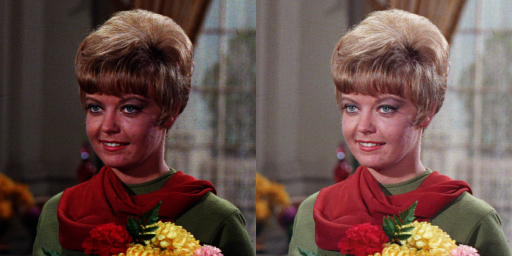

In [44]:
print(' Gamma Correction pada citra ')
print('----------------------------------')
try: 
  gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK_BSDA/Images/female.tiff')
gamma_image = np.zeros(original.shape, original.dtype)

# Akses gambar per pixel
for x in range(original.shape[0]):
  for y in range(original.shape[1]):
    for z in range(original.shape[2]):
      # Rumus Gamma Correction
     gamma_image[x,y,z] = np.clip(255 * ((original[x,y,z] / 255)**(1 / gamma)), 0, 255)
     
final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

# **2. Buat Simulasi Image Depth**
Percobaan ini digunakan sebagai simulasi dari proses kuantisasi citra. Pada kuantisasi citra, pixel dapat direpresentasikan dengan n-bit kedalaman (default menggunakan 8-bit). Pada pixel 8-bit, warna yang memungkinkan adalah 256 warna, dari 0 (0000 0000) hingga 255(1111 1111). Pada pixel 7-bit, warna yang memungkinkan adalah 128 warna, dari 0 (000 0000) hingga 127 (111 1111). Kemungkinan warna didapat dari pangkat 2 jumlah bit. Jika 7bit, maka jumlah warnanya adalah 2^7 = 128, dst. 

Berikut adalah kode untuk membaca citra masukan dan memberi nilai kedalaman citra, silahkan lanjutkan kode program berikut sehingga menghasilkan keluaran seperti contoh pada Gambar. 


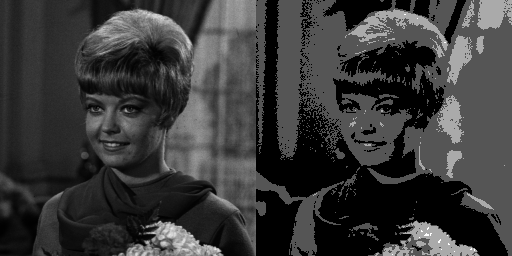

In [45]:
bit_depth=2
level = 255 / (pow(2,bit_depth)-1)

original2 = cv.imread('/content/drive/MyDrive/PCVK_BSDA/Images/female.tiff', cv.IMREAD_GRAYSCALE) 
depth_image = np.zeros(original2.shape, original2.dtype)

# Akses gambar tiap pixel
for y in range(original2.shape[0]):
  depth_image[y] = np.clip(np.round(original2[y]/level)*level, 0, 255)

final_frame = cv.hconcat((original2, depth_image))
cv2_imshow(final_frame)

# **3. Buat modul Average Denoising**
Buat modul average denoising sesuai dengan rumus yang telah diberikan pada sub bab sebelumnya. 
Citra asli sudah disediakan pada /images/galaxy.jpg. 
100 Citra dengan Gaussian Noise sudah disediakan pada /images/noises/*.jpg

Anda dapat menggunakan code berikut untuk membaca semua image dalam satu folder, gunakan modul glob (import glob)

Jumlah Citra di Average = 5
Nilai MSE =  114.6023689516129
Nilai PSNR = 27.538867658196118 dB


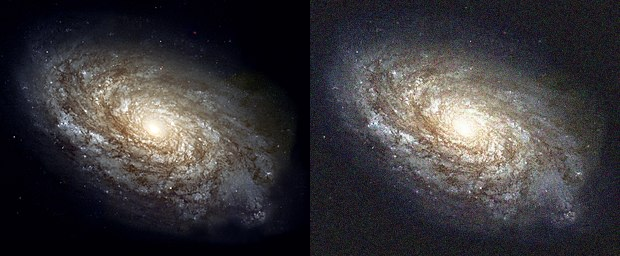

In [46]:
import glob
from math import log10, sqrt

original3 = cv.imread('/content/drive/MyDrive/PCVK_BSDA/Images/galaxy.jpg')

cv_img = [] 
for img in glob.glob('/content/drive/MyDrive/PCVK_BSDA/Images/noises/*.jpg'): 
  n= cv.imread(img) 
  cv_img.append(n)

# set jumlah citra di average
noise_image1 = cv_img[4]

#index (array) gambar pada folder noises dimulai dari 0
for i in range(4):
  alpha = 1.0 / (i + 1)
  beta = 1.0 - alpha
  noise_image1 = cv.addWeighted(cv_img[i], alpha, noise_image1, beta, 0.0)

# fungsi PSNR
def PSNR(original3, compress_image1): 
    mse = np.mean((original3 - compress_image1) ** 2) 
    if(mse == 0):  # MSE 0 maka tidak ada noise sama sekali, sehingga PSNR tidak memiliki arti
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr 

def MSE(original3, compress_image1): 
    mse1 = np.mean((original3 - compress_image1) ** 2) 
    return mse1

compress_image1 = noise_image1
psnr1 = PSNR(original3, compress_image1)
mse1 = MSE(original3, compress_image1)
print('Jumlah Citra di Average = 5')
print('Nilai MSE = ',mse1)
print('Nilai PSNR =', psnr1, 'dB')

final_frame = cv.hconcat((original3, noise_image1))
cv2_imshow(final_frame)

Jumlah Citra di Average = 30
Nilai MSE =  115.14463205645161
Nilai PSNR = 27.518366645303374 dB


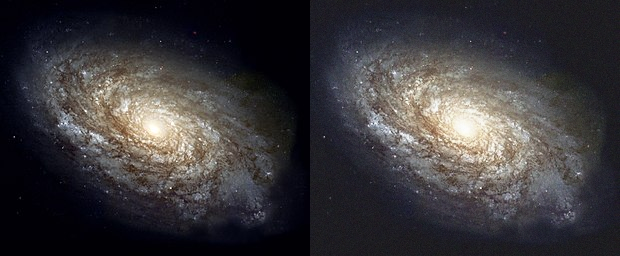

In [47]:
original3 = cv.imread('/content/drive/MyDrive/PCVK_BSDA/Images/galaxy.jpg')

cv_img = [] 
for img in glob.glob('/content/drive/MyDrive/PCVK_BSDA/Images/noises/*.jpg'): 
  n= cv.imread(img) 
  cv_img.append(n)

# set jumlah citra di average
noise_image2 = cv_img[29]

#index (array) gambar pada folder noises dimulai dari 0
for i in range(29):
  alpha = 1.0 / (i + 1)
  beta = 1.0 - alpha
  noise_image2 = cv.addWeighted(cv_img[i], alpha, noise_image2, beta, 0.0)

# fungsi PSNR
def PSNR(original3, compress_image2): 
    mse = np.mean((original3 - compress_image2) ** 2) 
    if(mse == 0):  # MSE 0 maka tidak ada noise sama sekali, sehingga PSNR tidak memiliki arti
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr

def MSE(original3, compress_image2): 
    mse2 = np.mean((original3 - compress_image2) ** 2) 
    return mse2

compress_image2 = noise_image2
psnr2 = PSNR(original3, compress_image2)
mse2 = MSE(original3, compress_image2)
print('Jumlah Citra di Average = 30')
print('Nilai MSE = ',mse2)
print('Nilai PSNR =', psnr2, 'dB')

final_frame = cv.hconcat((original3, noise_image2))
cv2_imshow(final_frame)

Jumlah Citra di Average = 30
Nilai MSE =  115.776171875
Nilai PSNR = 27.494611752937935 dB


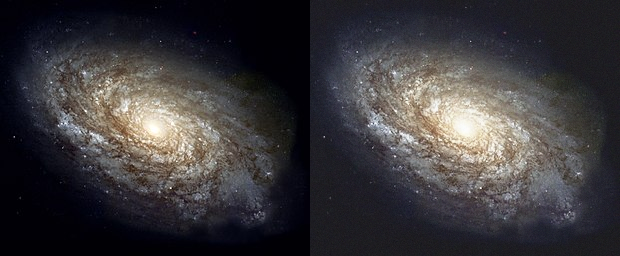

In [48]:
original3 = cv.imread('/content/drive/MyDrive/PCVK_BSDA/Images/galaxy.jpg')

cv_img = [] 
for img in glob.glob('/content/drive/MyDrive/PCVK_BSDA/Images/noises/*.jpg'): 
  n= cv.imread(img) 
  cv_img.append(n)

# set jumlah citra di average
noise_image3 = cv_img[59]

#index (array) gambar pada folder noises dimulai dari 0
for i in range(59):
  alpha = 1.0 / (i + 1)
  beta = 1.0 - alpha
  noise_image3 = cv.addWeighted(cv_img[i], alpha, noise_image3, beta, 0.0)

# fungsi PSNR
def PSNR(original3, compress_image3): 
    mse = np.mean((original3 - compress_image3) ** 2) 
    if(mse == 0):  # MSE 0 maka tidak ada noise sama sekali, sehingga PSNR tidak memiliki arti
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr 

def MSE(original3, compress_image3): 
    mse3 = np.mean((original3 - compress_image3) ** 2) 
    return mse3

compress_image3 = noise_image3
psnr3 = PSNR(original3, compress_image3)
mse3 = MSE(original3, compress_image3)
print('Jumlah Citra di Average = 30')
print('Nilai MSE = ',mse3)
print('Nilai PSNR =', psnr3, 'dB')

final_frame = cv.hconcat((original3, noise_image3))
cv2_imshow(final_frame)

Jumlah Citra di Average = 80
Nilai MSE =  115.5971186155914
Nilai PSNR = 27.50133351912679 dB


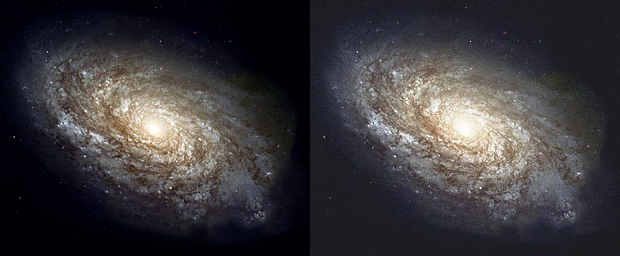

In [49]:
original3 = cv.imread('/content/drive/MyDrive/PCVK_BSDA/Images/galaxy.jpg')

cv_img = [] 
for img in glob.glob('/content/drive/MyDrive/PCVK_BSDA/Images/noises/*.jpg'): 
  n= cv.imread(img) 
  cv_img.append(n)

# set jumlah citra di average
noise_image4 = cv_img[79]

#index (array) gambar pada folder noises dimulai dari 0
for i in range(79):
  alpha = 1.0 / (i + 1)
  beta = 1.0 - alpha
  noise_image4 = cv.addWeighted(cv_img[i], alpha, noise_image4, beta, 0.0)

# fungsi PSNR
def PSNR(original3, compress_image4): 
    mse = np.mean((original3 - compress_image4) ** 2) 
    if(mse == 0):  # MSE 0 maka tidak ada noise sama sekali, sehingga PSNR tidak memiliki arti
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr 

def MSE(original3, compress_image4): 
    mse4 = np.mean((original3 - compress_image4) ** 2) 
    return mse4

compress_image4 = noise_image4
psnr4 = PSNR(original3, compress_image4)
mse4 = MSE(original3, compress_image4)
print('Jumlah Citra di Average = 80')
print('Nilai MSE = ',mse4)
print('Nilai PSNR =', psnr4, 'dB')

final_frame = cv.hconcat((original3, noise_image4))
cv2_imshow(final_frame)

Jumlah Citra di Average = 100
Nilai MSE =  115.52717573924731
Nilai PSNR = 27.503962044722225 dB


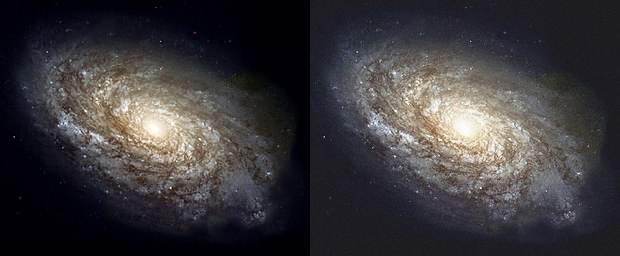

In [50]:
original3 = cv.imread('/content/drive/MyDrive/PCVK_BSDA/Images/galaxy.jpg')

cv_img = [] 
for img in glob.glob('/content/drive/MyDrive/PCVK_BSDA/Images/noises/*.jpg'): 
  n= cv.imread(img) 
  cv_img.append(n)

# set jumlah citra di average
noise_image5 = cv_img[99]

#index (array) gambar pada folder noises dimulai dari 0
for i in range(99):
  alpha = 1.0 / (i + 1)
  beta = 1.0 - alpha
  noise_image5 = cv.addWeighted(cv_img[i], alpha, noise_image5, beta, 0.0)

# fungsi PSNR
def PSNR(original3, compress_image5): 
    mse = np.mean((original3 - compress_image5) ** 2) 
    if(mse == 0):  # MSE 0 maka tidak ada noise sama sekali, sehingga PSNR tidak memiliki arti
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr 

def MSE(original3, compress_image5): 
    mse5 = np.mean((original3 - compress_image5) ** 2) 
    return mse5

compress_image5 = noise_image5
psnr5 = PSNR(original3, compress_image5)
mse5 = MSE(original3, compress_image5)
print('Jumlah Citra di Average = 100')
print('Nilai MSE = ',mse5)
print('Nilai PSNR =', psnr5, 'dB')

final_frame = cv.hconcat((original3, noise_image5))
cv2_imshow(final_frame)

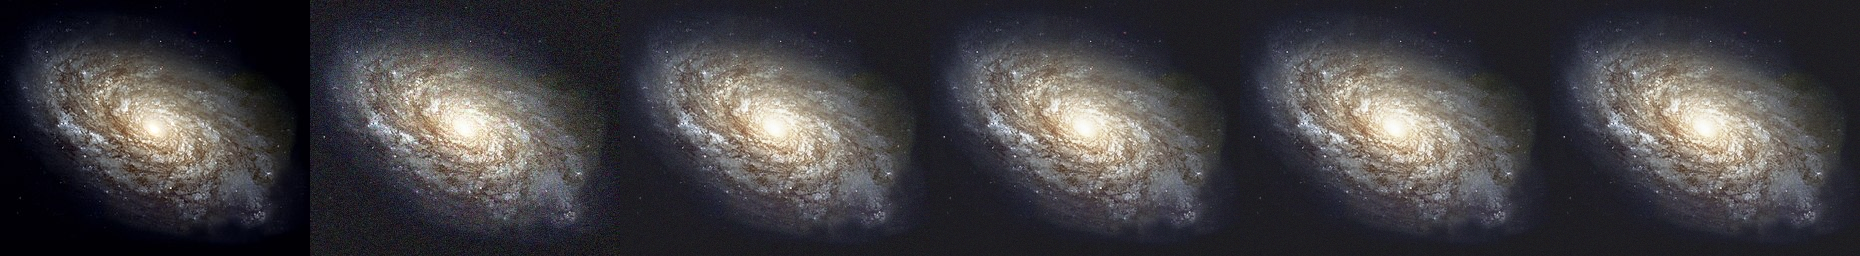

In [51]:
last_frame = cv.hconcat((original3, noise_image1, noise_image2, noise_image3, noise_image4, noise_image5))
cv2_imshow(last_frame)

In [52]:
print('Rangkuman Nilai MSE & PSNR :')
print('-----------------------------')
print('Jumlah Citra di Average = 5')
print('Nilai MSE = ',mse1)
print('Nilai PSNR =', psnr1, 'dB')
print('-----------------------------')
print('Jumlah Citra di Average = 30')
print('Nilai MSE = ',mse2)
print('Nilai PSNR =', psnr2, 'dB')
print('-----------------------------')
print('Jumlah Citra di Average = 60')
print('Nilai MSE = ',mse3)
print('Nilai PSNR =', psnr3, 'dB')
print('-----------------------------')
print('Jumlah Citra di Average = 80')
print('Nilai MSE = ',mse4)
print('Nilai PSNR =', psnr4, 'dB')
print('-----------------------------')
print('Jumlah Citra di Average = 100')
print('Nilai MSE = ',mse5)
print('Nilai PSNR =', psnr5, 'dB')

Rangkuman Nilai MSE & PSNR :
-----------------------------
Jumlah Citra di Average = 5
Nilai MSE =  114.6023689516129
Nilai PSNR = 27.538867658196118 dB
-----------------------------
Jumlah Citra di Average = 30
Nilai MSE =  115.14463205645161
Nilai PSNR = 27.518366645303374 dB
-----------------------------
Jumlah Citra di Average = 60
Nilai MSE =  115.776171875
Nilai PSNR = 27.494611752937935 dB
-----------------------------
Jumlah Citra di Average = 80
Nilai MSE =  115.5971186155914
Nilai PSNR = 27.50133351912679 dB
-----------------------------
Jumlah Citra di Average = 100
Nilai MSE =  115.52717573924731
Nilai PSNR = 27.503962044722225 dB


4. Buat image masking untuk image berikut. Image kiri adalah image asli (images/couple.tiff), 
sedangkan image paling kanan adalah hasilnya

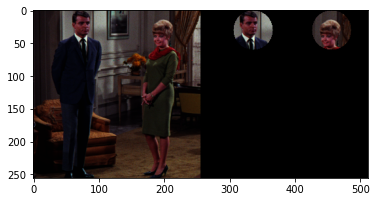

In [69]:
original4 = plt.imread('/content/drive/MyDrive/PCVK_BSDA/Images/couple.tiff')
couple_image = np.zeros(original4.shape, dtype = np.uint8)

couple_image1 = cv.circle(couple_image, center=(80,30), radius=30, color=(255,255,255), thickness =-1)
result = original4 & couple_image1

couple_image2 = cv.circle(couple_image, center=(200,30), radius=30, color=(255,255,255), thickness =-1)
result = original4 & couple_image2

final_frame = cv.hconcat((original4, result))
plt.imshow(final_frame)